A simple notebook to extract and visualize data from a gpx file

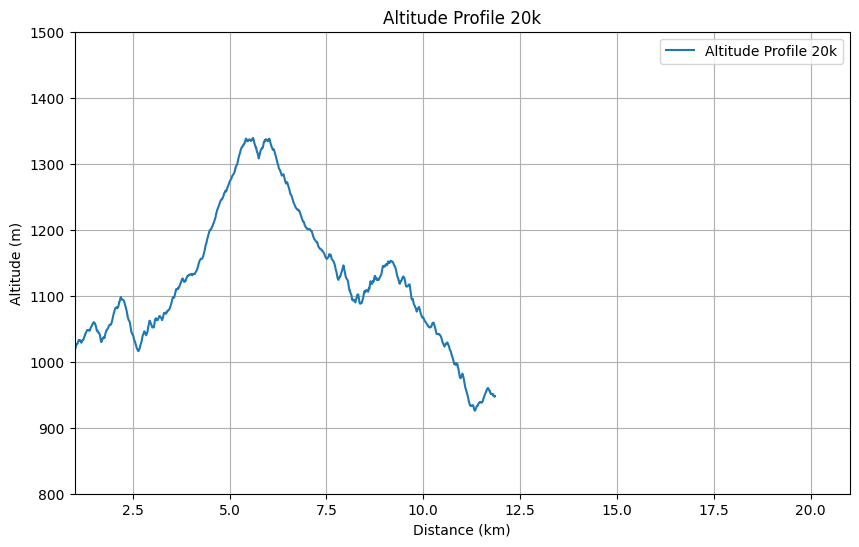

In [14]:
import gpxpy
import matplotlib.pyplot as plt
import folium

# Function to parse GPX file and extract latitude, longitude, and altitude data
def parse_gpx(file_path):
    with open(file_path, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)

    altitudes = []
    distances = []
    total_distance = 0
    coordinates = []

    for track in gpx.tracks:
        for segment in track.segments:
            for point_no, point in enumerate(segment.points):
                altitudes.append(point.elevation)
                coordinates.append((point.latitude, point.longitude))
                if point_no > 0:
                    total_distance += segment.points[point_no - 1].distance_3d(point)
                distances.append(total_distance / 1000)  # Convert to kilometers

    return distances, altitudes, coordinates

# Function to plot altitude profile
def plot_altitude_profile(distances, altitudes):
    plt.figure(figsize=(10, 6))
    plt.plot(distances, altitudes, label='Altitude Profile 20k')
    plt.xlabel('Distance (km)')
    # Set xrange 1 to 21 km
    plt.xlim(1, 21)
    plt.ylim(800, 1500)
    plt.ylabel('Altitude (m)')
    plt.title('Altitude Profile 20k')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot trail on a map
def plot_trail_on_map(coordinates):
    # Create a folium map centered at the start of the trail
    trail_map = folium.Map(location=coordinates[0], zoom_start=14)
    # Add the trail as a polyline
    folium.PolyLine(coordinates, color="blue", weight=2.5, opacity=1).add_to(trail_map)
    return trail_map

# Example usage
gpx_file_path = 'SkyRun12K.gpx'
distances, altitudes, coordinates = parse_gpx(gpx_file_path)

# Plot the altitude profile
plot_altitude_profile(distances, altitudes)

# Plot the trail on a map, together with altimetry lines
trail_map = plot_trail_on_map(coordinates)
trail_map.save("trail_map.html")

# To display the map in a Jupyter notebook, uncomment the following line:
trail_map

In [ ]:
# Also, plot the track on a map

